In [ ]:
## 20220550 윤명섭

import pandas as pd

file = '/content/owid-covid-data.csv'
df = pd.read_csv(file)
print(df.info())

locations = df['location']
print(locations)

locations.unique()

US_df = df[df['location'] == 'United States']
print(US_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397543 entries, 0 to 397542
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    397543 non-null  object 
 1   continent                                   378528 non-null  object 
 2   location                                    397543 non-null  object 
 3   date                                        397543 non-null  object 
 4   total_cases                                 358581 non-null  float64
 5   new_cases                                   386444 non-null  float64
 6   new_cases_smoothed                          385214 non-null  float64
 7   total_deaths                                336105 non-null  float64
 8   new_deaths                                  386794 non-null  float64
 9   new_deaths_smoothed                         385564 non-null  float64
 

In [ ]:
# 1번 문제
US_DateIndex_df = US_df.set_index('date')
US_DateIndex_df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,USA,North America,United States,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,-2771.0,-4.41,-4.41,-8.248447
2020-01-06,USA,North America,United States,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
2020-01-07,USA,North America,United States,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
2020-01-08,USA,North America,United States,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
2020-01-09,USA,North America,United States,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


In [ ]:
# 2번 문제
US_TtlCases = US_DateIndex_df['total_cases']
print(US_TtlCases)

date
2020-01-05            NaN
2020-01-06            NaN
2020-01-07            NaN
2020-01-08            NaN
2020-01-09            NaN
                 ...     
2024-04-24    103436829.0
2024-04-25    103436829.0
2024-04-26    103436829.0
2024-04-27    103436829.0
2024-04-28    103436829.0
Name: total_cases, Length: 1576, dtype: float64


            United States  South Korea
date                                  
2020-01-05            NaN          NaN
2020-01-06            NaN          NaN
2020-01-07            NaN          NaN
2020-01-08            NaN          NaN
2020-01-09            NaN          NaN
Axes(0.125,0.11;0.775x0.77)


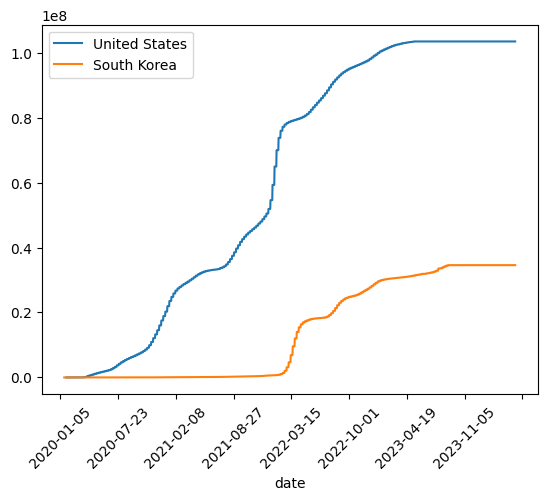

In [ ]:
# 3, 4번 문제
kor_df = df[df['location'] == 'South Korea']
# print(kor_df.head())
kor_DateIndex_df = kor_df.set_index('date')
# print(kor_DateIndex_df.head())
kor_TtlCases = kor_DateIndex_df['total_cases']
# print(kor_TtlCases)

target_df = pd.concat([US_TtlCases, kor_TtlCases], axis=1)
target_df.columns = ['United States', 'South Korea']
print(target_df.head())

print(target_df['2020-01-01' : '2024-12-31'].plot.line(rot=45))


In [ ]:
# 5번 문제
kor_popul = kor_DateIndex_df['population']['2020-01-05']
US_popul = US_DateIndex_df['population']['2020-01-05']
print('미국 인구(', US_popul, ')/대한민국(', kor_popul, ')')

rate = round(US_popul / kor_popul, 2)
print(rate)

target_wanted_df = pd.concat([kor_TtlCases*rate, US_TtlCases], axis=1)
target_wanted_df.columns = ['South Korea', 'United States']
print(target_wanted_df.iloc[50:56])
print(target_wanted_df.head())


미국 인구( 338289856.0 )/대한민국( 51815808.0 )
6.53
            South Korea  United States
date                                  
2020-02-24      3630.68           40.0
2020-02-25      3630.68           40.0
2020-02-26      3630.68           40.0
2020-02-27      3630.68           40.0
2020-02-28      3630.68           40.0
2020-02-29      3630.68           40.0
            South Korea  United States
date                                  
2020-01-05          NaN            NaN
2020-01-06          NaN            NaN
2020-01-07          NaN            NaN
2020-01-08          NaN            NaN
2020-01-09          NaN            NaN


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


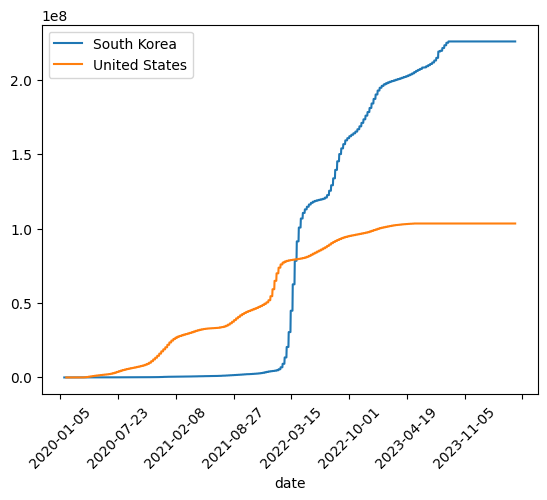

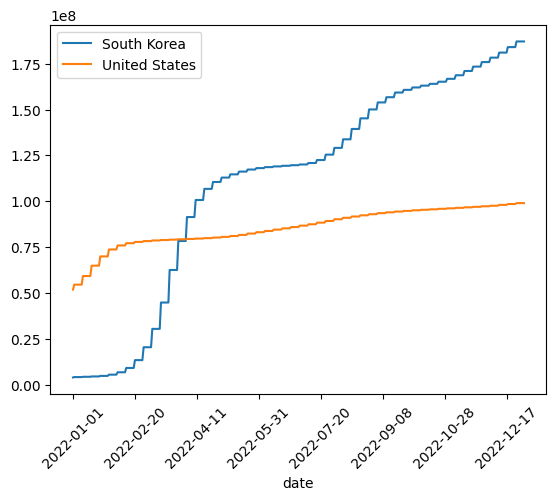

In [ ]:
print(target_wanted_df[:].plot.line(rot=45))
print(target_wanted_df['2022-01-01':'2022-12-31'].plot.line(rot=45))

프랑스 인구( 67813000 )/대한민국( 51815808.0 )
1.31
Axes(0.125,0.11;0.775x0.77)


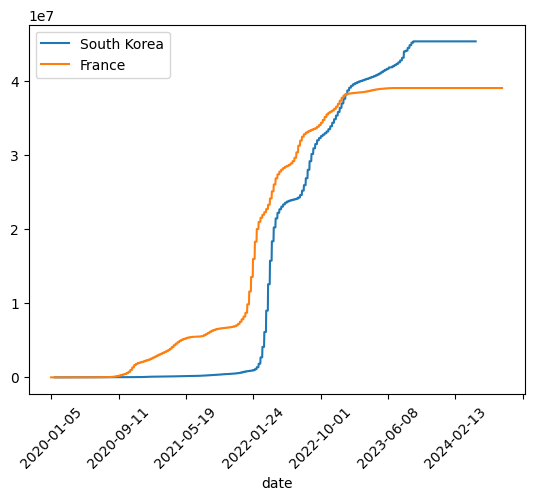

In [ ]:
# 6번 문제
# 대한민국과 프랑스의 코로나 상황에 대한 일자별 총 인구대비 확진자 수 비율 변동 추이 (그래프)

path = 'https://covid.ourworldindata.org/data/'
file = path + 'owid-covid-data.csv'
df2 = pd.read_csv(file)
# print(df2.head())

fra_df = df2[df2['location'] == 'France']
# print(fra_df.head())
fra_DateIndex_df = fra_df.set_index('date')
# print(fra_DateIndex_df.head())
fra_TtlCases = fra_DateIndex_df['total_cases']
# print(fra_TtlCases)

target_df2 = pd.concat([kor_TtlCases, fra_TtlCases], axis=1)
target_df2.columns = ['South Korea', 'France']
# print(target_df2.head())

# print(target_df2['2020-01-01' : '2024-12-31'].plot.line(rot=45))

fra_popul = fra_DateIndex_df['population']['2020-01-05']
kor_popul = kor_DateIndex_df['population']['2020-01-05']
print('프랑스 인구(', fra_popul, ')/대한민국(', kor_popul, ')')

rate2 = round(fra_popul / kor_popul, 2)
print(rate2)                  # 값이 1보다 크므로, 확진자 수: 대한민국 < 프랑스

target_wanted_df2 = pd.concat([kor_TtlCases*rate2, fra_TtlCases], axis=1)
target_wanted_df2.columns = ['South Korea', 'France']
# print(target_wanted_df2.iloc[50:56])
# print(target_wanted_df2.head())

print(target_wanted_df2[:].plot.line(rot=45))
